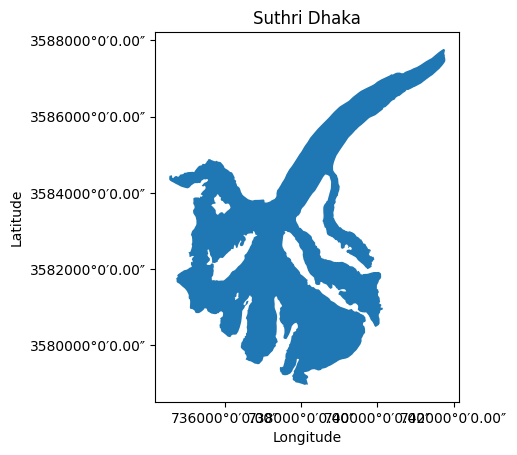

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Function to convert DMS (in raw format like DDMMSS) to decimal degrees
def dms_to_dd(dms):
    # Assuming input is in the format DDMMSS
    d = int(str(dms)[:2])  # First 2 digits are degrees
    m = int(str(dms)[2:4])  # Next 2 digits are minutes
    s = int(str(dms)[4:6])  # Last 2 digits are seconds
    return d + (m / 60) + (s / 3600)

# Function to convert decimal degrees to DMS string for axis labeling
def deg_to_dms_str(deg):
    d = int(deg)
    m = int((deg - d) * 60)
    s = (deg - d - m/60) * 3600
    return f"{abs(d)}°{abs(m)}′{abs(s):.2f}″"

# Load the shapefile (ensure your data is in DDMMSS format for lat/long)
shapefile = gpd.read_file('C:/Users/imsam/OneDrive/Desktop/ArcGis datasets/Snow Depth Suthri Dhaka')

# Plot the shapefile
ax = shapefile.plot()

# Customize the plot
plt.title('Suthri Dhaka')

# Customizing the x and y axes to show DMS
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: deg_to_dms_str(x)))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: deg_to_dms_str(y)))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
